In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import numpy as np
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Music Data

In [2]:
chart = pd.read_pickle('spotify_data/charts_us_daily.pkl')
chart

,date,uri,artist_names,track_name,streams
0,2017-01-01,spotify:track:4Km5HrUvYTaSUfiSGPJeQR,"Migos, Lil Uzi Vert",Bad and Boujee (feat. Lil Uzi Vert),1371493
1,2017-01-01,spotify:track:343YBumqHu19cGoGARUTsd,Drake,Fake Love,1180074
2,2017-01-01,spotify:track:5aAx2yezTd8zXrkmtKl66Z,"The Weeknd, Daft Punk",Starboy,1064351
3,2017-01-01,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,"The Chainsmokers, Halsey",Closer,1010492
4,2017-01-01,spotify:track:6fujklziTHa8uoM5OQSfIo,"Rae Sremmurd, Gucci Mane",Black Beatles,874289
...,...,...,...,...,...
437379,2022-12-27,spotify:track:18vXApRmJSgQ6wG2ll9AOg,Polo G,RAPSTAR,248361
437380,2022-12-27,spotify:track:01Lr5YepbgjXAWR9iOEyH1,Chief Keef,Love Sosa,248312
437381,2022-12-27,spotify:track:6PGoSes0D9eUDeeAafB2As,"Kendrick Lamar, Zacari",LOVE. FEAT. ZACARI.,247369
437382,2022-12-27,spotify:track:2i2qDe3dnTl6maUE31FO7c,"Lil Durk, Future",Mad Max,247233


In [3]:
audio_features = pd.read_pickle('spotify_data/us_audio_features.pkl')
audio_features

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,uri,valence
0,0.0611,0.926,343150,0.666,0.000000,11,0.123,-5.314,1,0.2440,127.079,4,spotify:track:4Km5HrUvYTaSUfiSGPJeQR,0.168
1,0.1050,0.928,210937,0.481,0.000000,9,0.176,-9.350,0,0.2870,134.007,4,spotify:track:343YBumqHu19cGoGARUTsd,0.613
2,0.1650,0.681,230453,0.594,0.000003,7,0.134,-7.028,1,0.2820,186.054,4,spotify:track:5aAx2yezTd8zXrkmtKl66Z,0.535
3,0.4140,0.748,244960,0.524,0.000000,8,0.111,-5.599,1,0.0338,95.010,4,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,0.661
4,0.1420,0.794,291893,0.632,0.000000,0,0.128,-6.163,1,0.0649,145.926,4,spotify:track:6fujklziTHa8uoM5OQSfIo,0.355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10586,0.1870,0.491,169419,0.643,0.000000,10,0.109,-4.309,1,0.0442,162.469,4,spotify:track:6Um358vY92UBv5DloTRX9L,0.779
10587,0.1260,0.380,223120,0.488,0.000007,9,0.115,-6.637,1,0.0290,156.031,3,spotify:track:3fl4zil6HJ0N1FL3YIRwdC,0.268
10588,0.8590,0.735,175890,0.449,0.000000,2,0.213,-9.933,0,0.3830,146.016,4,spotify:track:3zkyus0njMCL6phZmNNEeN,0.514
10589,0.1480,0.587,199040,0.632,0.000010,9,0.158,-5.416,1,0.0311,139.974,4,spotify:track:5UNMyX2AzF8X90wAYAxG6Q,0.392


In [4]:
merged = pd.merge(chart, audio_features, how='left', on='uri')
merged

,date,uri,artist_names,track_name,streams,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,2017-01-01,spotify:track:4Km5HrUvYTaSUfiSGPJeQR,"Migos, Lil Uzi Vert",Bad and Boujee (feat. Lil Uzi Vert),1371493,0.0611,0.926,343150,0.666,0.000000,11,0.1230,-5.314,1,0.2440,127.079,4,0.168
1,2017-01-01,spotify:track:343YBumqHu19cGoGARUTsd,Drake,Fake Love,1180074,0.1050,0.928,210937,0.481,0.000000,9,0.1760,-9.350,0,0.2870,134.007,4,0.613
2,2017-01-01,spotify:track:5aAx2yezTd8zXrkmtKl66Z,"The Weeknd, Daft Punk",Starboy,1064351,0.1650,0.681,230453,0.594,0.000003,7,0.1340,-7.028,1,0.2820,186.054,4,0.535
3,2017-01-01,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,"The Chainsmokers, Halsey",Closer,1010492,0.4140,0.748,244960,0.524,0.000000,8,0.1110,-5.599,1,0.0338,95.010,4,0.661
4,2017-01-01,spotify:track:6fujklziTHa8uoM5OQSfIo,"Rae Sremmurd, Gucci Mane",Black Beatles,874289,0.1420,0.794,291893,0.632,0.000000,0,0.1280,-6.163,1,0.0649,145.926,4,0.355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437379,2022-12-27,spotify:track:18vXApRmJSgQ6wG2ll9AOg,Polo G,RAPSTAR,248361,0.4100,0.789,165926,0.536,0.000000,6,0.1290,-6.862,1,0.2420,81.039,4,0.437
437380,2022-12-27,spotify:track:01Lr5YepbgjXAWR9iOEyH1,Chief Keef,Love Sosa,248312,0.0361,0.772,246213,0.413,0.000000,0,0.1110,-8.193,0,0.0890,131.965,4,0.211
437381,2022-12-27,spotify:track:6PGoSes0D9eUDeeAafB2As,"Kendrick Lamar, Zacari",LOVE. FEAT. ZACARI.,247369,0.2640,0.800,213400,0.585,0.000000,10,0.1530,-7.343,1,0.0924,126.058,4,0.779
437382,2022-12-27,spotify:track:2i2qDe3dnTl6maUE31FO7c,"Lil Durk, Future",Mad Max,247233,0.0212,0.898,153600,0.640,0.000000,5,0.0919,-8.796,0,0.2550,149.988,4,0.680


In [5]:
df = merged.groupby('date').mean()
df = df.reset_index()
df

,date,streams,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,2017-01-01,275695.290,0.174849,0.682195,219318.020,0.631460,0.010280,5.345,0.172110,-6.834540,0.595,0.133142,123.730195,4.010,0.507154
1,2017-01-02,244474.120,0.198050,0.676540,223566.330,0.610385,0.007649,5.215,0.159602,-6.780690,0.560,0.141110,121.742455,3.985,0.442366
2,2017-01-03,275844.070,0.198134,0.674955,222978.725,0.608545,0.007650,5.235,0.155095,-6.810895,0.555,0.140436,121.535735,3.985,0.439141
3,2017-01-04,279699.470,0.202646,0.675850,222926.035,0.606130,0.007649,5.215,0.156017,-6.836490,0.555,0.142561,121.886265,3.985,0.437441
4,2017-01-05,281175.620,0.199213,0.679165,223006.955,0.609325,0.007618,5.215,0.158836,-6.770560,0.555,0.146078,122.266465,3.985,0.442275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182,2022-12-23,639124.345,0.435715,0.587360,185662.295,0.519293,0.013357,5.165,0.202814,-8.807545,0.760,0.079477,119.934625,3.855,0.506791
2183,2022-12-24,807570.805,0.503029,0.559850,183334.840,0.493444,0.016747,4.970,0.202584,-9.239150,0.785,0.068537,122.075040,3.815,0.525138
2184,2022-12-25,983287.510,0.561597,0.530840,182859.635,0.456983,0.031556,4.780,0.206994,-10.070315,0.815,0.062073,120.122735,3.800,0.536399
2185,2022-12-26,411703.320,0.372856,0.613145,192940.245,0.540455,0.019938,5.455,0.187094,-8.421880,0.680,0.088761,122.411895,3.880,0.479222


### データ確認

In [8]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2187 entries, 0 to 2186
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              2187 non-null   datetime64[ns]
 1   streams           2187 non-null   float64       
 2   acousticness      2187 non-null   float64       
 3   danceability      2187 non-null   float64       
 4   duration_ms       2187 non-null   float64       
 5   energy            2187 non-null   float64       
 6   instrumentalness  2187 non-null   float64       
 7   key               2187 non-null   float64       
 8   liveness          2187 non-null   float64       
 9   loudness          2187 non-null   float64       
 10  mode              2187 non-null   float64       
 11  speechiness       2187 non-null   float64       
 12  tempo             2187 non-null   float64       
 13  time_signature    2187 non-null   float64       
 14  valence           2187 n

In [49]:
df.describe()

,streams,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000
mean,390687.213684,0.230508,0.691077,202998.233021,0.604277,0.010937,5.245547,0.170968,-6.688920,0.600839,0.132043,122.391952,3.957144,0.461002
std,62669.516428,0.044761,0.029115,10056.581276,0.022379,0.007535,0.293634,0.011524,0.447228,0.048504,0.017326,1.607753,0.030875,0.022455
min,244474.120000,0.149339,0.530840,182774.590000,0.456983,0.001254,4.245000,0.145062,-10.070315,0.470000,0.062073,116.524352,3.800000,0.391658
25%,350270.805000,0.205731,0.671033,195120.882500,0.594400,0.005858,5.055000,0.162567,-6.775160,0.565000,0.122521,121.340413,3.940000,0.447081
50%,380808.530000,0.230487,0.699355,200856.055000,0.606500,0.008260,5.275000,0.171421,-6.586885,0.600000,0.135344,122.397175,3.965000,0.461578
75%,416420.952500,0.246261,0.713753,210134.140000,0.620078,0.014462,5.460000,0.179145,-6.439518,0.630000,0.144906,123.406510,3.980000,0.475784
max,983287.510000,0.561597,0.740740,230742.430000,0.653595,0.041552,6.030000,0.206994,-5.987105,0.840000,0.177510,127.363045,4.020000,0.541944


### daily to weekly

In [9]:
df.set_index('date', inplace=True)
weekly_df = df.resample('W', closed='left', loffset=pd.DateOffset(days=-1)).mean()
weekly_df = weekly_df.reset_index()
weekly_df = weekly_df.iloc[:-2, :]
weekly_df

/var/folders/bk/syp6nsbn40j6khhtbc03r73c0000gn/T/ipykernel_83651/3993231805.py:2: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  weekly_df = df.resample('W', closed='left', loffset=pd.DateOffset(days=-1)).mean()


,date,streams,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,2017-01-07,274957.725000,0.199451,0.678136,222818.768571,0.611036,0.008058,5.215714,0.160939,-6.798274,0.564286,0.141912,122.051256,3.990000,0.450447
1,2017-01-14,293409.487143,0.209622,0.680016,222590.459286,0.611083,0.008922,5.108571,0.162923,-6.690543,0.568571,0.144263,121.839189,3.992143,0.445364
2,2017-01-21,298598.352857,0.204695,0.681625,223133.477143,0.610969,0.008538,5.102857,0.162393,-6.662102,0.586429,0.147719,122.024264,3.990000,0.444405
3,2017-01-28,303346.843571,0.203175,0.685446,222548.520714,0.616126,0.007737,5.050714,0.161694,-6.567819,0.597143,0.149756,122.827694,3.992143,0.444522
4,2017-02-04,318830.679286,0.200754,0.687161,222704.521429,0.621949,0.007891,5.120714,0.165934,-6.470991,0.587143,0.148415,122.980359,3.995714,0.438982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,2022-11-19,441424.546429,0.283860,0.639744,203339.553571,0.564391,0.026785,5.332857,0.173963,-7.722780,0.657143,0.109392,122.880699,3.910000,0.414541
307,2022-11-26,409545.130714,0.320016,0.627029,198973.428571,0.553904,0.024688,5.352857,0.175255,-8.138209,0.678571,0.101401,122.944777,3.901429,0.445472
308,2022-12-03,467009.413571,0.333944,0.621561,196330.993571,0.547081,0.021377,5.323571,0.186131,-8.324961,0.692143,0.097725,123.443685,3.890000,0.452017
309,2022-12-10,552191.642143,0.336226,0.616893,195403.864286,0.552735,0.018768,5.246429,0.195838,-8.173394,0.682143,0.098950,123.427412,3.876429,0.451449


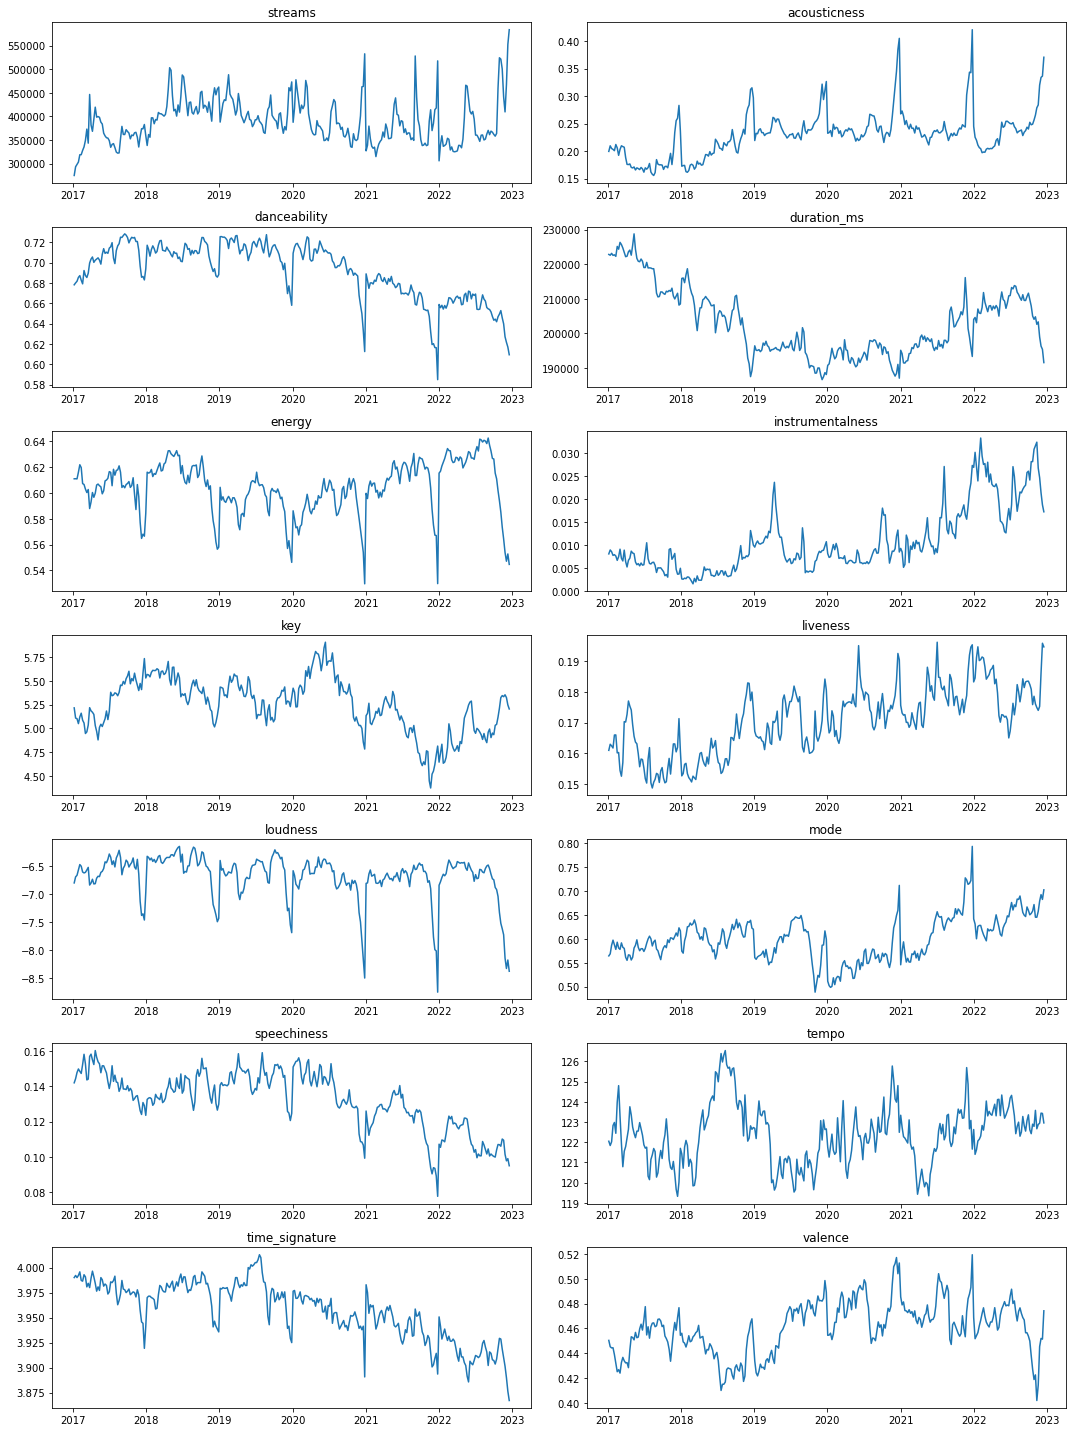

In [43]:
fig = plt.figure(figsize=[15, 20])

ax1 = fig.add_subplot(7, 2, 1)
ax2 = fig.add_subplot(7, 2, 2)
ax3 = fig.add_subplot(7, 2, 3)
ax4 = fig.add_subplot(7, 2, 4)
ax5 = fig.add_subplot(7, 2, 5)
ax6 = fig.add_subplot(7, 2, 6)
ax7 = fig.add_subplot(7, 2, 7)
ax8 = fig.add_subplot(7, 2, 8)
ax9 = fig.add_subplot(7, 2, 9)
ax10 = fig.add_subplot(7, 2, 10)
ax11 = fig.add_subplot(7, 2, 11)
ax12 = fig.add_subplot(7, 2, 12)
ax13 = fig.add_subplot(7, 2, 13)
ax14 = fig.add_subplot(7, 2, 14)

x = weekly_df['date']
y1 = weekly_df['streams']
y2 = weekly_df['acousticness']
y3 = weekly_df['danceability']
y4 = weekly_df['duration_ms']
y5 = weekly_df['energy']
y6 = weekly_df['instrumentalness']
y7 = weekly_df['key']
y8 = weekly_df['liveness']
y9 = weekly_df['loudness']
y10 = weekly_df['mode']
y11 = weekly_df['speechiness']
y12 = weekly_df['tempo']
y13 = weekly_df['time_signature']
y14 = weekly_df['valence']

ax1.plot(x, y1)
ax2.plot(x, y2)
ax3.plot(x, y3)
ax4.plot(x, y4)
ax5.plot(x, y5)
ax6.plot(x, y6)
ax7.plot(x, y7)
ax8.plot(x, y8)
ax9.plot(x, y9)
ax10.plot(x, y10)
ax11.plot(x, y11)
ax12.plot(x, y12)
ax13.plot(x, y13)
ax14.plot(x, y14)


ax1.set_title('streams')
ax2.set_title('acousticness')
ax3.set_title('danceability')
ax4.set_title('duration_ms')
ax5.set_title('energy')
ax6.set_title('instrumentalness')
ax7.set_title('key')
ax8.set_title('liveness')
ax9.set_title('loudness')
ax10.set_title('mode')
ax11.set_title('speechiness')
ax12.set_title('tempo')
ax13.set_title('time_signature')
ax14.set_title('valence')


fig.tight_layout()
plt.show()

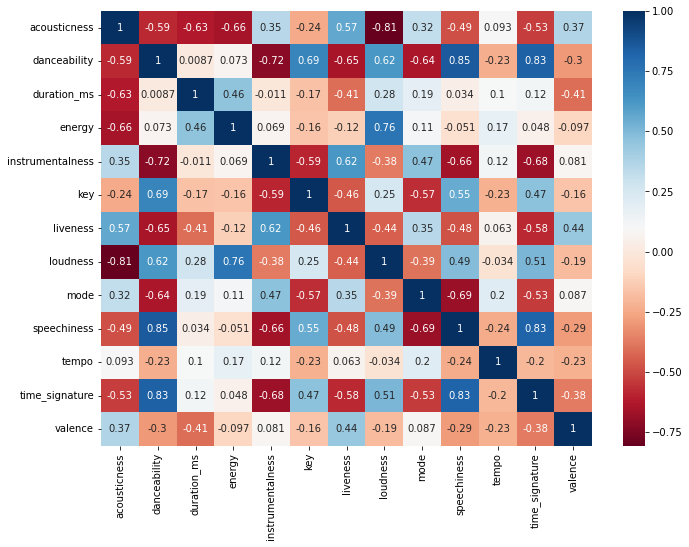

In [77]:
corr = weekly_df.drop('streams',axis=1).corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="RdBu",annot=True)
plt.show()

# Economic Data

In [54]:
wei = pd.read_csv('economic_indicators/weekely_economic_index.csv')
wei

,DATE,WEI
0,2017-01-07,1.61
1,2017-01-14,1.85
2,2017-01-21,1.12
3,2017-01-28,2.18
4,2017-02-04,2.55
...,...,...
306,2022-11-19,1.39
307,2022-11-26,1.64
308,2022-12-03,1.30
309,2022-12-10,0.72


In [55]:
wei['DATE'] = pd.to_datetime(wei['DATE'])
wei.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    311 non-null    datetime64[ns]
 1   WEI     311 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.0 KB


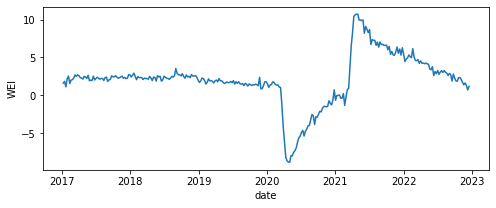

In [61]:
plt.figure(figsize=(8,3))
plt.xlabel('date')
plt.ylabel('WEI')
plt.plot(wei['DATE'], wei['WEI'])

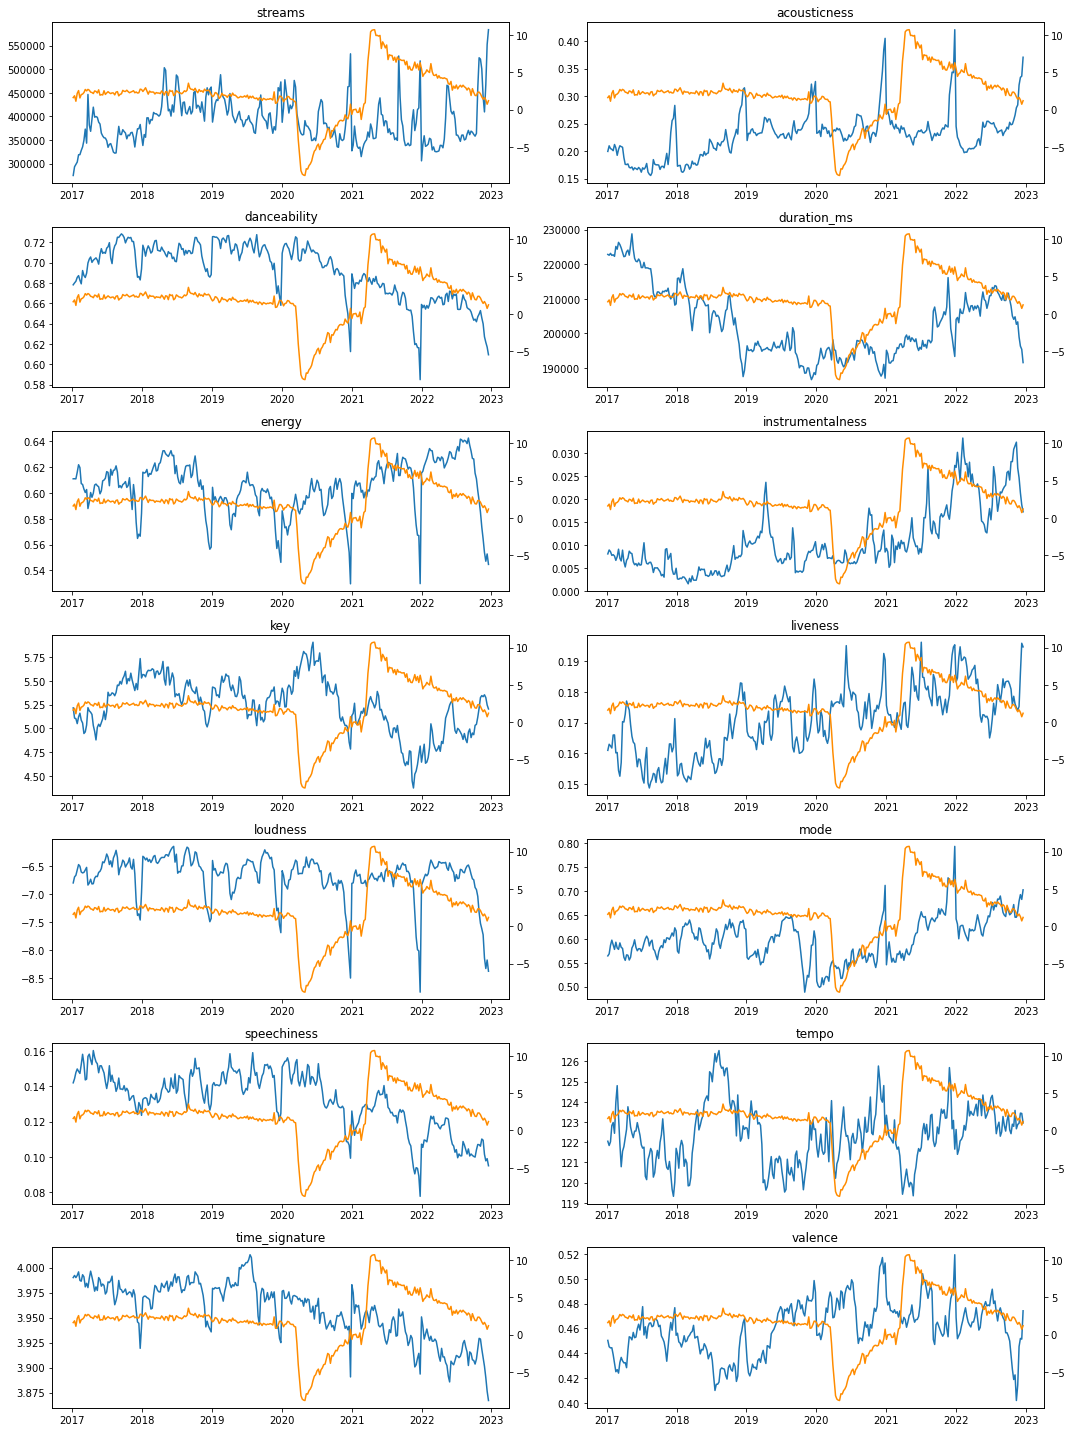

In [75]:
fig = plt.figure(figsize=[15, 20])

ax1 = fig.add_subplot(7, 2, 1)
ax2 = fig.add_subplot(7, 2, 2)
ax3 = fig.add_subplot(7, 2, 3)
ax4 = fig.add_subplot(7, 2, 4)
ax5 = fig.add_subplot(7, 2, 5)
ax6 = fig.add_subplot(7, 2, 6)
ax7 = fig.add_subplot(7, 2, 7)
ax8 = fig.add_subplot(7, 2, 8)
ax9 = fig.add_subplot(7, 2, 9)
ax10 = fig.add_subplot(7, 2, 10)
ax11 = fig.add_subplot(7, 2, 11)
ax12 = fig.add_subplot(7, 2, 12)
ax13 = fig.add_subplot(7, 2, 13)
ax14 = fig.add_subplot(7, 2, 14)

x = weekly_df['date']
y1 = weekly_df['streams']
y2 = weekly_df['acousticness']
y3 = weekly_df['danceability']
y4 = weekly_df['duration_ms']
y5 = weekly_df['energy']
y6 = weekly_df['instrumentalness']
y7 = weekly_df['key']
y8 = weekly_df['liveness']
y9 = weekly_df['loudness']
y10 = weekly_df['mode']
y11 = weekly_df['speechiness']
y12 = weekly_df['tempo']
y13 = weekly_df['time_signature']
y14 = weekly_df['valence']

z = wei['WEI']

ax1.plot(x, y1)
ax2.plot(x, y2)
ax3.plot(x, y3)
ax4.plot(x, y4)
ax5.plot(x, y5)
ax6.plot(x, y6)
ax7.plot(x, y7)
ax8.plot(x, y8)
ax9.plot(x, y9)
ax10.plot(x, y10)
ax11.plot(x, y11)
ax12.plot(x, y12)
ax13.plot(x, y13)
ax14.plot(x, y14)

ax1_1 = ax1.twinx()
ax2_1 = ax2.twinx()
ax3_1 = ax3.twinx()
ax4_1 = ax4.twinx()
ax5_1 = ax5.twinx()
ax6_1 = ax6.twinx()
ax7_1 = ax7.twinx()
ax8_1 = ax8.twinx()
ax9_1 = ax9.twinx()
ax10_1 = ax10.twinx()
ax11_1 = ax11.twinx()
ax12_1 = ax12.twinx()
ax13_1 = ax13.twinx()
ax14_1 = ax14.twinx()


ax1_1.plot(x, z, color='darkorange')
ax2_1.plot(x, z, color='darkorange')
ax3_1.plot(x, z, color='darkorange')
ax4_1.plot(x, z, color='darkorange')
ax5_1.plot(x, z, color='darkorange')
ax6_1.plot(x, z, color='darkorange')
ax7_1.plot(x, z, color='darkorange')
ax8_1.plot(x, z, color='darkorange')
ax9_1.plot(x, z, color='darkorange')
ax10_1.plot(x, z, color='darkorange')
ax11_1.plot(x, z, color='darkorange')
ax12_1.plot(x, z, color='darkorange')
ax13_1.plot(x, z, color='darkorange')
ax14_1.plot(x, z, color='darkorange')

ax1.set_title('streams')
ax2.set_title('acousticness')
ax3.set_title('danceability')
ax4.set_title('duration_ms')
ax5.set_title('energy')
ax6.set_title('instrumentalness')
ax7.set_title('key')
ax8.set_title('liveness')
ax9.set_title('loudness')
ax10.set_title('mode')
ax11.set_title('speechiness')
ax12.set_title('tempo')
ax13.set_title('time_signature')
ax14.set_title('valence')


fig.tight_layout()
plt.show()

In [166]:
x = wei[['WEI']]
x = sm.add_constant(x)
y = weekly_df[['acousticness']]

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           acousticness   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.984
Date:                Sun, 08 Jan 2023   Prob (F-statistic):              0.160
Time:                        23:36:22   Log-Likelihood:                 554.79
No. Observations:                 311   AIC:                            -1106.
Df Residuals:                     309   BIC:                            -1098.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2317      0.003     84.557      0.0

In [167]:
x = wei[['WEI']]
x = sm.add_constant(x)
y = weekly_df[['danceability']]

model = sm.OLS(y, x).fit()
print(model.summary())

danceability_coef = model.params[1]

                            OLS Regression Results                            
Dep. Variable:           danceability   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     40.88
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           5.97e-10
Time:                        23:36:30   Log-Likelihood:                 695.81
No. Observations:                 311   AIC:                            -1388.
Df Residuals:                     309   BIC:                            -1380.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6975      0.002    400.538      0.0

### Ppl listen to songs with higher danceability when the econmy is down and vice versa

In [116]:
x = wei[['WEI']]
x = sm.add_constant(x)
y = weekly_df[['duration_ms']]

model = sm.OLS(y, x).fit()
print(model.summary())

duration_ms_coef = model.params[1]

                            OLS Regression Results                            
Dep. Variable:            duration_ms   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     22.79
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           2.79e-06
Time:                        20:42:00   Log-Likelihood:                -3291.3
No. Observations:                 311   AIC:                             6587.
Df Residuals:                     309   BIC:                             6594.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.014e+05    643.781    312.850      0.0

In [117]:
x = wei[['WEI']]
x = sm.add_constant(x)
y = weekly_df[['energy']]

model = sm.OLS(y, x).fit()
print(model.summary())

energy_coef = model.params[1]

                            OLS Regression Results                            
Dep. Variable:                 energy   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     30.15
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           8.34e-08
Time:                        20:42:10   Log-Likelihood:                 782.98
No. Observations:                 311   AIC:                            -1562.
Df Residuals:                     309   BIC:                            -1554.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6008      0.001    456.590      0.0

In [118]:
x = wei[['WEI']]
x = sm.add_constant(x)
y = weekly_df[['instrumentalness']]

model = sm.OLS(y, x).fit()
print(model.summary())

instrumentalness_coef = model.params[1]

                            OLS Regression Results                            
Dep. Variable:       instrumentalness   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     29.97
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           9.08e-08
Time:                        20:42:25   Log-Likelihood:                 1109.3
No. Observations:                 311   AIC:                            -2215.
Df Residuals:                     309   BIC:                            -2207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0095      0.000     20.719      0.0

In [119]:
x = wei[['WEI']]
x = sm.add_constant(x)
y = weekly_df[['key']]

model = sm.OLS(y, x).fit()
print(model.summary())

key_coef = model.params[1]

                            OLS Regression Results                            
Dep. Variable:                    key   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     119.3
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           1.05e-23
Time:                        20:42:40   Log-Likelihood:                0.95172
No. Observations:                 311   AIC:                             2.097
Df Residuals:                     309   BIC:                             9.576
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3408      0.016    328.379      0.0

In [90]:
x = wei[['WEI']]
x = sm.add_constant(x)
y = weekly_df[['liveness']]

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               liveness   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.011
Date:                Sun, 08 Jan 2023   Prob (F-statistic):              0.157
Time:                        20:14:29   Log-Likelihood:                 965.23
No. Observations:                 311   AIC:                            -1926.
Df Residuals:                     309   BIC:                            -1919.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1703      0.001    232.572      0.0

In [91]:
x = wei[['WEI']]
x = sm.add_constant(x)
y = weekly_df[['loudness']]

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               loudness   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                   0.04235
Date:                Sun, 08 Jan 2023   Prob (F-statistic):              0.837
Time:                        20:15:00   Log-Likelihood:                -156.93
No. Observations:                 311   AIC:                             317.9
Df Residuals:                     309   BIC:                             325.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.6768      0.027   -247.090      0.0

In [120]:
x = wei[['WEI']]
x = sm.add_constant(x)
y = weekly_df[['mode']]

model = sm.OLS(y, x).fit()
print(model.summary())

mode_coef = model.params[1]

                            OLS Regression Results                            
Dep. Variable:                   mode   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     75.61
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           2.07e-16
Time:                        20:42:55   Log-Likelihood:                 551.93
No. Observations:                 311   AIC:                            -1100.
Df Residuals:                     309   BIC:                            -1092.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5874      0.003    212.365      0.0

In [130]:
x = wei[['WEI']]
x = sm.add_constant(x)
y = weekly_df[['speechiness']]

model = sm.OLS(y, x).fit()
print(model.summary())

speechiness_coef = model.params[1]

                            OLS Regression Results                            
Dep. Variable:            speechiness   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     24.97
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           9.79e-07
Time:                        21:00:10   Log-Likelihood:                 848.84
No. Observations:                 311   AIC:                            -1694.
Df Residuals:                     309   BIC:                            -1686.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1351      0.001    126.917      0.0

In [131]:
x = wei[['WEI']]
x = sm.add_constant(x)
y = weekly_df[['tempo']]

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  tempo   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5842
Date:                Sun, 08 Jan 2023   Prob (F-statistic):              0.445
Time:                        21:00:11   Log-Likelihood:                -559.18
No. Observations:                 311   AIC:                             1122.
Df Residuals:                     309   BIC:                             1130.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        122.4335      0.098   1243.020      0.0

In [132]:
x = wei[['WEI']]
x = sm.add_constant(x)
y = weekly_df[['time_signature']]

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         time_signature   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     11.81
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           0.000671
Time:                        21:00:12   Log-Likelihood:                 669.96
No. Observations:                 311   AIC:                            -1336.
Df Residuals:                     309   BIC:                            -1328.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9611      0.002   2093.207      0.0

In [133]:
x = wei[['WEI']]
x = sm.add_constant(x)
y = weekly_df[['valence']]

model = sm.OLS(y, x).fit()
print(model.summary())

valence_coef = model.params[1]

                            OLS Regression Results                            
Dep. Variable:                valence   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     3.429
Date:                Sun, 08 Jan 2023   Prob (F-statistic):             0.0650
Time:                        21:00:12   Log-Likelihood:                 760.83
No. Observations:                 311   AIC:                            -1518.
Df Residuals:                     309   BIC:                            -1510.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4623      0.001    327.178      0.0

In [142]:
def music_index(danceability, energy, instrumentalness, key, mode, speechiness, valence):
    return (danceability/danceability_coef) + (energy/energy_coef) + (instrumentalness/instrumentalness_coef) + (key/key_coef) + (mode/mode_coef) + (speechiness/speechiness_coef)

weekly_df['music_index'] = weekly_df.apply(lambda x: music_index(x['danceability'],
                                                                 x['energy'],
                                                                 x['instrumentalness'],
                                                                 x['key'],
                                                                 x['mode'],
                                                                 x['speechiness'],
                                                                 x['valence']),axis=1)

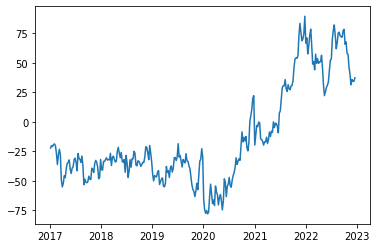

In [144]:
plt.plot(weekly_df['date'], weekly_df['music_index'])
plt.show()

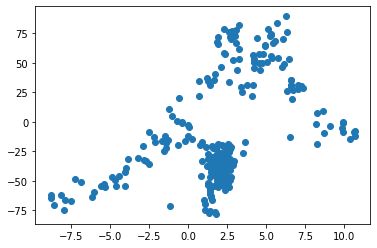

In [146]:
plt.scatter(wei['WEI'], weekly_df['music_index'])
plt.show()

In [147]:
x = wei[['WEI']]
x = sm.add_constant(x)
y = weekly_df[['music_index']]

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            music_index   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     88.59
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           1.16e-18
Time:                        21:11:31   Log-Likelihood:                -1563.4
No. Observations:                 311   AIC:                             3131.
Df Residuals:                     309   BIC:                             3138.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -26.3512      2.488    -10.592      0.0

In [165]:
X = weekly_df[['energy', 'danceability', 'key', 'mode', 'speechiness', 'valence', 'tempo']]
y = wei[['WEI']]

model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    WEI   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     37.12
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           2.30e-37
Time:                        23:01:56   Log-Likelihood:                -715.62
No. Observations:                 311   AIC:                             1447.
Df Residuals:                     303   BIC:                             1477.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          101.4694     17.075      5.943   

In [159]:
# Calculate the VIF for each independent variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

# Display the results
vif

,VIF Factor,features
0,605.264770,energy
1,394.171664,key
2,239.975659,mode
3,359.718026,valence
4,125.925556,speechiness
